# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
# dataset = pd.read_csv('Dataset.csv')
# X = dataset.iloc[:, 1:-1].values
# y = dataset.iloc[:, -1].values
data=pd.read_csv("Dataset.csv")
X=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [12]:
import numpy as np
# First transform 6.5 to feature scaling
sc_X_val = sc_X.transform(np.array([[6.5]]))
# Second predict the value
scaled_y_pred = regressor.predict(sc_X_val).reshape(-1,1)
# Third - since this is scaled - we have to inverse transform
y_pred = sc_y.inverse_transform(scaled_y_pred).reshape(1,-1)
print('The predicted salary of a person at 6.5 Level is ',y_pred)

The predicted salary of a person at 6.5 Level is  [[170370.0204065]]


## Visualising the SVR results

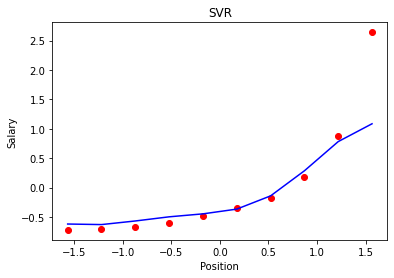

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X, y , color="red")
plt.plot(X, regressor.predict(X), color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()